# Kalman Filtering

In [1]:
import Simulator
import Observation
import Statistics
import KalmanFilter

## Loading simulator 

For Kalman filtering we have to be able to propagate a Gaussian distribution in time and to have access to the linear operators

In [2]:
timestamp = "2021_08_10-09_34_31"

grid, simulator = Simulator.from_file(timestamp)

## Definition of initial distribution 

The inital state is equipped with a Gaussian distribution specified by its mean and covariance. 

In [3]:
statistics = Statistics.Statistics(simulator)

Please remember to set priors!


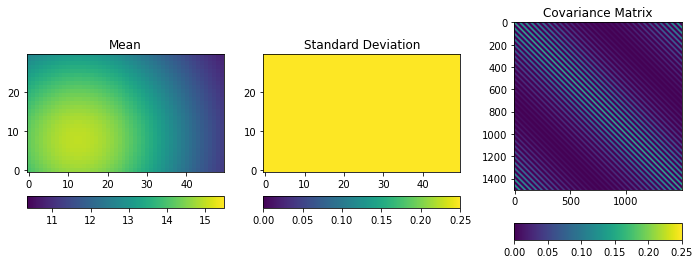

In [4]:
prior_args = Statistics.prior_args_from_file(timestamp)
statistics.set_prior(prior_args)

statistics.plot()

## Loading observations 

Observation positions which are fixed for a setup and values from the truth

In [5]:
obs_timestamp = "2021_08_10-09_34_39"
observation = Observation.from_file(grid, timestamp)

Remember to set observation positions and to set/observe values!


In [6]:
import numpy as np
import scipy.stats

In [7]:
trials = 500

truths = np.zeros((grid.N_x, trials))
observations = np.zeros((observation.N_y, trials))
updated_means = np.zeros((grid.N_x,trials))
updated_stddevs = np.zeros((grid.N_x, trials))
forecasted_means = np.zeros((grid.N_x,trials))
forecasted_stddevs = np.zeros((grid.N_x, trials))

for s in range(trials):
    print("Experiment ", s)
    
    # Generate new observations of a new truth
    observation.clear_observations()

    for t in range(10):
        statistics.propagate(nt=25)
        observation.observe(statistics.mean)
    
    observations[:,s] = observation.obses[observation.N_obs-1]
    truths[:,s] = statistics.mean

    # Data assimilation for the new observations
    statistics.set_prior(prior_args)
    kalmanFilter = KalmanFilter.Kalman(statistics, observation)

    for t in range(observation.N_obs):
        statistics.propagate(25)
        if t == (observation.N_obs-1):
            forecasted_means[:,s] = statistics.mean
            forecasted_stddevs[:,s] = statistics.stddev

        kalmanFilter.filter(statistics.mean, statistics.cov, observation.obses[t])

    updated_means[:,s] = statistics.mean
    updated_stddevs[:,s] = statistics.stddev

Experiment  0
Experiment  1
Experiment  2
Experiment  3
Experiment  4
Experiment  5
Experiment  6
Experiment  7
Experiment  8
Experiment  9
Experiment  10
Experiment  11
Experiment  12
Experiment  13
Experiment  14
Experiment  15
Experiment  16
Experiment  17
Experiment  18
Experiment  19
Experiment  20
Experiment  21
Experiment  22
Experiment  23
Experiment  24
Experiment  25
Experiment  26
Experiment  27
Experiment  28
Experiment  29
Experiment  30
Experiment  31
Experiment  32
Experiment  33
Experiment  34
Experiment  35
Experiment  36
Experiment  37
Experiment  38
Experiment  39
Experiment  40
Experiment  41
Experiment  42
Experiment  43
Experiment  44
Experiment  45
Experiment  46
Experiment  47
Experiment  48
Experiment  49
Experiment  50
Experiment  51
Experiment  52
Experiment  53
Experiment  54
Experiment  55
Experiment  56
Experiment  57
Experiment  58
Experiment  59
Experiment  60
Experiment  61
Experiment  62
Experiment  63
Experiment  64
Experiment  65
Experiment  66
Exper

In [8]:
updated_coverage = np.zeros(trials)

for s in range(trials):
    if truths[0,s] < updated_means[0,s] + 1.96*updated_stddevs[0,s] and truths[0,s] > updated_means[0,s] - 1.96*updated_stddevs[0,s]:
        updated_coverage[s] = 1

In [9]:
np.sum(updated_coverage)/trials

0.96

In [10]:
forecasted_coverage = np.zeros(trials)

for s in range(trials):
    if truths[0,s] < forecasted_means[0,s] + 1.96*forecasted_stddevs[0,s] and truths[0,s] > forecasted_means[0,s] - 1.96*forecasted_stddevs[0,s]:
        forecasted_coverage[s] = 1

In [11]:
np.sum(forecasted_coverage)/trials

1.0

In [12]:
updated_coverages = np.zeros(grid.N_x)

for s in range(trials):
    for i in range(grid.N_x):
        if truths[i,s] < updated_means[i,s] + 1.96*updated_stddevs[i,s] and truths[i,s] > updated_means[i,s] - 1.96*updated_stddevs[i,s]:
            updated_coverages[i] = updated_coverages[i]+1/trials

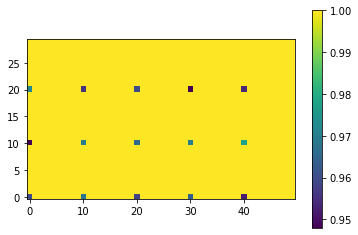

In [20]:
from matplotlib import pyplot as plt
plt.imshow(np.reshape(updated_coverages,(grid.ny, grid.nx)), origin="lower")
plt.colorbar()

In [14]:
ens_truths = np.zeros((grid.N_x, trials))
ens_observations = np.zeros((observation.N_y, trials))
ens_updated_means = np.zeros((grid.N_x,trials))
ens_updated_stddevs = np.zeros((grid.N_x, trials))
ens_forecasted_means = np.zeros((grid.N_x,trials))
ens_forecasted_stddevs = np.zeros((grid.N_x, trials))

for s in range(trials):
    print("Experiment ", s)
    
    # Generate new observations of a new truth
    observation.clear_observations()

    for t in range(10):
        statistics.propagate(nt=25)
        observation.observe(statistics.mean)
    
    ens_observations[:,s] = observation.obses[observation.N_obs-1]
    ens_truths[:,s] = statistics.mean

    # Data assimilation for the new observations
    statistics.set_prior(prior_args)
    kalmanFilter = KalmanFilter.Kalman(statistics, observation)

    for t in range(observation.N_obs):
        statistics.propagate(25)
        if t == (observation.N_obs-1):
            ens_forecasted_means[:,s] = statistics.mean
            ens_forecasted_stddevs[:,s] = statistics.stddev

        kalmanFilter.filter(statistics.mean, statistics.cov, observation.obses[t])

    ens_updated_means[:,s] = statistics.mean
    ens_updated_stddevs[:,s] = statistics.stddev

Experiment  0
Experiment  1
Experiment  2
Experiment  3
Experiment  4
Experiment  5
Experiment  6
Experiment  7
Experiment  8
Experiment  9
Experiment  10
Experiment  11
Experiment  12
Experiment  13
Experiment  14
Experiment  15
Experiment  16
Experiment  17
Experiment  18
Experiment  19
Experiment  20
Experiment  21
Experiment  22
Experiment  23
Experiment  24
Experiment  25
Experiment  26
Experiment  27
Experiment  28
Experiment  29
Experiment  30
Experiment  31
Experiment  32
Experiment  33
Experiment  34
Experiment  35
Experiment  36
Experiment  37
Experiment  38
Experiment  39
Experiment  40
Experiment  41
Experiment  42
Experiment  43
Experiment  44
Experiment  45
Experiment  46
Experiment  47
Experiment  48
Experiment  49
Experiment  50
Experiment  51
Experiment  52
Experiment  53
Experiment  54
Experiment  55
Experiment  56
Experiment  57
Experiment  58
Experiment  59
Experiment  60
Experiment  61
Experiment  62
Experiment  63
Experiment  64
Experiment  65
Experiment  66
Exper

In [15]:
ens_updated_coverage = np.zeros(trials)

for s in range(trials):
    if ens_truths[0,s] < ens_updated_means[0,s] + 1.96*ens_updated_stddevs[0,s] and ens_truths[0,s] > ens_updated_means[0,s] - 1.96*ens_updated_stddevs[0,s]:
        ens_updated_coverage[s] = 1

In [18]:
np.sum(ens_updated_coverage)/trials

0.952

In [17]:
ens_updated_coverages = np.zeros(grid.N_x)

for s in range(trials):
    for i in range(grid.N_x):
        if ens_truths[i,s] < ens_updated_means[i,s] + 1.96*ens_updated_stddevs[i,s] and ens_truths[i,s] > ens_updated_means[i,s] - 1.96*ens_updated_stddevs[i,s]:
            ens_updated_coverages[i] = ens_updated_coverages[i]+1/trials

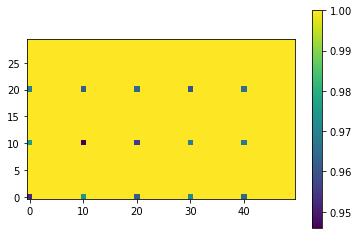

In [21]:
plt.imshow(np.reshape(ens_updated_coverages,(grid.ny, grid.nx)), origin="lower")
plt.colorbar()